<a href="https://colab.research.google.com/github/zahrabashir98/Berkeley_AI-Pacman_Projects/blob/master/Task_SI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!rm -rf Detection-of-Propaganda-Techniques
!git clone https://github.com/zahrabashir98/Detection-of-Propaganda-Techniques.git


Cloning into 'Detection-of-Propaganda-Techniques'...
remote: Enumerating objects: 1231, done.
remote: Counting objects: 100% (1231/1231), done.
remote: Compressing objects: 100% (1159/1159), done.
remote: Total 1231 (delta 18), reused 1207 (delta 8), pack-reused 0
Receiving objects: 100% (1231/1231), 3.44 MiB | 3.07 MiB/s, done.
Resolving deltas: 100% (18/18), done.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train_folder = "Detection-of-Propaganda-Techniques/datasets/train-articles/"
labels_folders = "Detection-of-Propaganda-Techniques/datasets/train-labels-task1-span-identification/"
dev_folder = "datasets/dev-articles/"
propaganda_techniques_file = "Detection-of-Propaganda-Techniques/tools/data/propaganda-techniques-names-semeval2020task11.txt/"
task_SI_output_file = "output-SI.txt"

In [5]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras import backend as K
from keras.callbacks import ModelCheckpoint

import glob
import os
import random
import keras
import tensorflow as tf
import numpy as np



random.seed(10) # to make runs deterministic

Using TensorFlow backend.


In [9]:
def detect_line(article, s, e):
    r = article[s:e]
    line = 0
    for i in range(0,len(article)):

        if i>s:
            return line
        if article[i]=='\n':
            line+=1


train_file_list = glob.glob(os.path.join(train_folder, "*.txt"))
labels_file_list = glob.glob(os.path.join(labels_folders, "*.txt"))
train_list = []
label_list = []
total_lines = 0
# print(train_file_list)
for i in train_file_list:
    lines = []
    f = open(i, 'r')
    txt = f.read()
    # print(txt)
    # break
    tmp = txt.split('\n')
    # print(tmp)
    # break
    label_addr = labels_folders + i.split('/')[-1].split('.')[0] + '.task1-SI.labels'

    ff = open(label_addr, 'r')
    label_txt = ff.read()
    # print(label_txt)
    # break
    tmp2 = label_txt.split('\n')
    # print(tmp2)
    # break
    for k in tmp2:
        if k!='':
            s = int(k.split()[1])
            e = int(k.split()[2])
            lines.append(detect_line(txt, s, e))

    c=0
    for j in tmp:
        if j!='':
            train_list.append(j)
            if c in lines:
                label_list.append(1)
            else:
                label_list.append(0)
            
        c+=1

print(train_list)

['Two cases of Ebola confirmed in the Democratic Republic of the Congo', 'Two cases of Ebola have been confirmed in the Democratic Republic of the Congo (DRC), according to a government health official.', 'Jean Jack Muyembe, head of the national institute for biological research, said that at least ten more cases were also suspected in the northwestern town of Bikoro.', 'Local health officials in Democratic Republic of Congo reported 21 patients showing signs of hemorrhagic fever and 17 deaths in the affected area before an Ebola outbreak was confirmed on Tuesday, the health ministry said.', 'Medical teams have taken five samples from suspected active cases and two tested positive for the Zaire strain of the Ebola virus, the ministry said in a statement.', 'It is the ninth time Ebola has been recorded in the DRC.', 'Last year, eight people were infected and four people died after an outbreak of the disease.', 'Ebola virus disease, formerly known as Ebola haemorrhagic fever, is a severe

In [7]:
tokenizer = Tokenizer(num_words = None, filters = '!"#$%&()*+,-./:;<=>?@[\\]^_{|}~\t\n', lower=True, split=' ')
tokenizer.fit_on_texts(train_list)
sequences = tokenizer.texts_to_sequences(train_list)


# print(train_list[0])
print(sequences)
# label_list = to_categorical(label_list)
# print(label_list.shape)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

[[103, 296, 3, 451, 269, 5, 1, 302, 1047, 3, 1, 1048], [103, 296, 3, 451, 22, 41, 269, 5, 1, 302, 1047, 3, 1, 1048, 2528, 144, 2, 6, 117, 363, 297], [3861, 6472, 12795, 531, 3, 1, 221, 1622, 9, 5707, 1049, 29, 7, 26, 364, 1374, 61, 296, 43, 55, 1572, 5, 1, 6473, 3367, 3, 2107], [782, 363, 180, 5, 302, 1047, 3, 1048, 215, 970, 2672, 1727, 2812, 3, 3368, 1785, 4, 765, 2108, 5, 1, 1623, 766, 94, 30, 451, 368, 11, 269, 10, 519, 1, 363, 1257, 29], [1195, 4188, 22, 404, 463, 3165, 24, 1572, 1012, 296, 4, 103, 5708, 2197, 9, 1, 5709, 4189, 3, 1, 451, 1028, 1, 1257, 29, 5, 6, 293], [12, 8, 1, 3862, 81, 451, 25, 41, 2813, 5, 1, 2528], [127, 113, 1295, 53, 43, 1013, 4, 458, 53, 1107, 54, 30, 368, 3, 1, 587], [451, 1028, 587, 6474, 263, 14, 451, 7619, 1785, 8, 6, 2971, 734, 3369, 2673, 5, 2422], [1, 1028, 8, 2972, 2, 53, 24, 3863, 3591, 4, 2814, 5, 1, 607, 901, 184, 607, 2, 607, 4190], [12, 8, 1334, 2, 18, 659, 77, 195, 9420, 19, 3864, 38, 71, 2973, 1, 1028, 199, 3166], [98, 3591, 106, 9421, 80, 

In [8]:
# maxlen = max(x_train, key=len)
# print(maxlen)

x_train = sequence.pad_sequences(sequences,dtype=object, padding='post', truncating='post', value=0.0)

y_train = np.array(label_list)
x_data = x_train[:]
y_data = y_train[:]
x_train = x_train[:len(x_train)-20]
y_train = y_train[:len(y_train)-20]

print(x_train[0])
print(y_train[0])
# print(y_train[3])
# print(label_list.count(1))
# print(label_list.count(0))

[103 296 3 451 269 5 1 302 1047 3 1 1048 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0]
0


In [0]:
x_valid = x_data[len(x_data)-100:]
y_valid = y_data[len(y_data)-100:]

print(x_valid.shape)
print(y_valid.shape)

(100, 129)
(100,)


In [0]:
def recall(y_true, y_pred):
    """
    Recall metric.

    Only computes a batch-wise average of recall.

    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def precision(y_true, y_pred):
    """
    Precision metric.

    Only computes a batch-wise average of precision.

    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.

    Source
    ------
    https://github.com/fchollet/keras/issues/5400#issuecomment-314747992
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def f1(y_true, y_pred):
    """Calculate the F1 score."""
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * ((p * r) / (p + r))

def create_model(nb_classes, input_shape):
    """Create a MLP model."""
    input_ = Input(shape=input_shape)
    x = input_
    x = Dense(16, activation='relu')(x)
    x = Dense(16, activation='relu')(x)
    x = Dense(nb_classes)(x)
    x = Activation('sigmoid')(x)
    model = Model(inputs=input_, outputs=x)
    return model

In [0]:
def get_LSTM_basic_model():
    model = Sequential()
    model.add(Embedding(1000, 128))
    model.add(Bidirectional(LSTM(64)))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile('adam', 'mse', metrics=["accuracy",f1 ,recall, precision])
    return model

save_dir = os.path.join(os.getcwd())
model_name = 'SimpleLSTM.{epoch:03d}.h5'

filepath = os.path.join(save_dir, model_name)

checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='acc',
                             verbose=1,
                             save_best_only=True)

callbacks = [checkpoint]


batch_size = 32
epochs = 10
print(x_train)
m = get_LSTM_basic_model()
history = m.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs, callbacks=callbacks, validation_data=(x_valid,y_valid))


[[74 2008 24 ... 0.0 0.0 0.0]
 [2812 339 2008 ... 0.0 0.0 0.0]
 [1 2008 339 ... 0.0 0.0 0.0]
 ...
 [1 11322 304 ... 0.0 0.0 0.0]
 [304 293 1092 ... 0.0 0.0 0.0]
 [6 3607 121 ... 0.0 0.0 0.0]]




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 16653 samples, validate on 100 samples
Epoch 1/10





16653/16653 [==============================] - 167s 10ms/step - loss: 0.1797 - acc: 0.7390 - f1: nan - recall: 0.1317 - precision: 0.3884 - val_loss: 0.1439 - val_acc: 0.7900 - val_f1: nan - val_recall: 0.4364 - val_precision: 0.3200

Epoch 00001: acc improved from -inf to 0.73903, saving model to /content/SimpleLSTM.001.h5
Epoch 2/10
16653/16653 [==============================] - 157s 9ms/step - loss: 0.1642 - acc: 0.7657 - f1: nan - recall: 0.3072 - precision: 0.6326 - val_loss: 0.1341 - val_acc: 0.8100 - val_f1: nan - 

Final Acc:0.821147963773766
Final Loss:0.1319243939562042
Final Precision:0.7446243693902512
Final Recall:0.4915297780276875


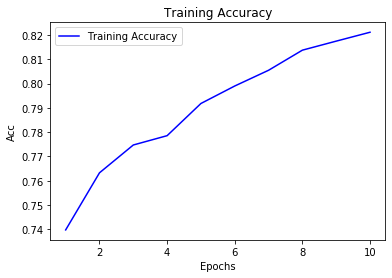

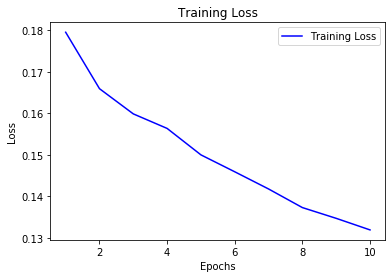

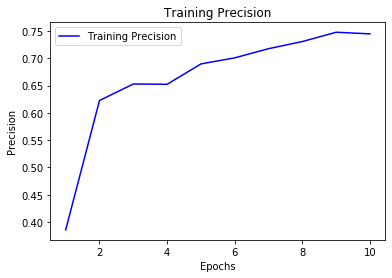

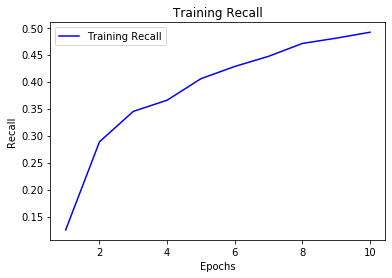

In [0]:
# %matplotlib inline
import matplotlib.pyplot as plt

history_dict = history.history
# print(history_dict)
acc = history_dict['acc']
print("Training Acc:%s"%(acc[10-1]))
val_acc = history_dict['val_acc']
print("Validation Acc:%s"%(acc[10-1]))
loss = history_dict['loss']
print("Final Loss:%s"%(loss[10-1]))
prec = history_dict['precision']
print("Final Precision:%s"%(prec[10-1]))
recall = history_dict['recall']
print("Final Recall:%s"%(recall[10-1]))


epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'bo', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, prec, 'b', label='Training Precision')
plt.title('Training Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.show()

plt.plot(epochs, recall, 'b', label='Training Recall')
plt.title('Training Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.show()

In [0]:
def get_LSTM_basic_model():
    model = Sequential()
    model.add(Embedding(1000, 128))
    model.add(Bidirectional(LSTM( units=128, dropout=.3, return_sequences=True, kernel_initializer='he_normal')))
    model.add(Bidirectional(LSTM( units=128, dropout=.2, kernel_initializer='he_normal')))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
    model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
    model.add(Dense(1, activation='sigmoid', kernel_initializer='he_normal'))
    model.compile('adam', 'binary_crossentropy', metrics=["accuracy",f1 ,recall, precision])
    model.summary()
    return model

save_dir = os.path.join(os.getcwd())
model_name = '2LSTMs.{epoch:03d}.h5'

filepath = os.path.join(save_dir, model_name)

checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='acc',
                             verbose=1,
                             save_best_only=True)

callbacks = [checkpoint]

batch_size = 32
epochs = 10
print(x_train)
m = get_LSTM_basic_model()
history = m.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs, callbacks=callbacks, validation_data=(x_valid,y_valid))

[[74 2008 24 ... 0.0 0.0 0.0]
 [2812 339 2008 ... 0.0 0.0 0.0]
 [1 2008 339 ... 0.0 0.0 0.0]
 ...
 [1 11322 304 ... 0.0 0.0 0.0]
 [304 293 1092 ... 0.0 0.0 0.0]
 [6 3607 121 ... 0.0 0.0 0.0]]
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 128)         128000    
_________________________________________________________________
bidirectional_3 (Bidirection (None, None, 256)         263168    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 256)               394240    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
____________________________________________________________

{'val_loss': [0.4349730157852173, 0.3948906338214874, 0.4408262848854065, 0.3794747471809387, 0.3737438678741455, 0.3576535248756409, 0.27837141752243044, 0.32608096361160277, 0.344897186756134, 0.2828275465965271], 'val_acc': [0.8, 0.83, 0.82, 0.82, 0.8, 0.84, 0.89, 0.86, 0.87, 0.87], 'val_f1': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], 'val_recall': [0.0, 0.24727272987365723, 0.35636363983154296, 0.35636363983154296, 0.3854545497894287, 0.35636363983154296, 0.3854545497894287, 0.3854545497894287, 0.49454545974731445, 0.41454545974731444], 'val_precision': [0.0, 0.33142857551574706, 0.35200000762939454, 0.3093333435058594, 0.29600000381469727, 0.3733333396911621, 0.48, 0.3866666603088379, 0.4228571510314941, 0.4662857246398926], 'loss': [0.5420896576301748, 0.5045603044965937, 0.4873780794833176, 0.4699007237071369, 0.453665580290227, 0.4360449307370614, 0.42227069690751073, 0.4217608211180516, 0.39863819964460473, 0.3733614111219749], 'acc': [0.7388458536142688, 0.7522968834

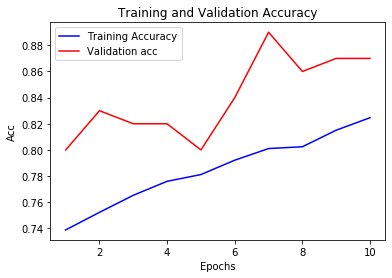

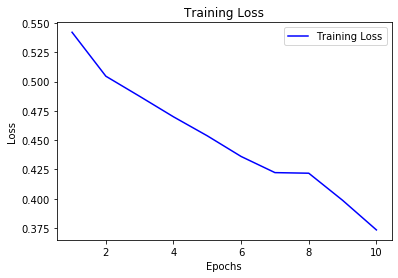

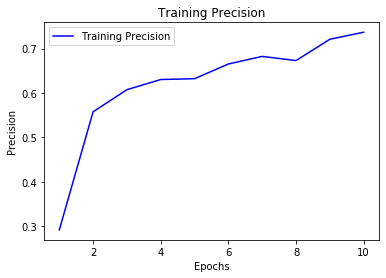

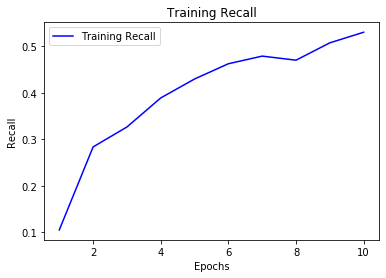

In [0]:
# %matplotlib inline
import matplotlib.pyplot as plt

history_dict = history.history
print(history_dict)
acc = history_dict['acc']
print("Training Acc:%s"%(acc[10-1]))
val_acc = history_dict['val_acc']
print("Validation Acc:%s"%(acc[10-1]))
loss = history_dict['loss']
print("Final Loss:%s"%(loss[10-1]))
prec = history_dict['precision']
print("Final Precision:%s"%(prec[10-1]))
recall = history_dict['recall']
print("Final Recall:%s"%(recall[10-1]))


epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, prec, 'b', label='Training Precision')
plt.title('Training Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.show()

plt.plot(epochs, recall, 'b', label='Training Recall')
plt.title('Training Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.show()

**GloVe: Global Vectors for Word Representation**

In [0]:
!wget http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip

--2020-01-27 17:13:34--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.1’

glove.6B.zip.1       22%[===>                ] 186.83M  2.00MB/s    eta 3m 57s ^C


In [0]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
replace glove.6B.50d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [0]:
embeddings_index = {}
f = open('glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [0]:
embedding_matrix = np.zeros((len(word_index) + 1, 100))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [0]:
from keras.layers import Embedding
MAX_SEQUENCE_LENGTH = 29
# model.add(Embedding(len((word_index), 128), weights=[embedding_matrix])
embedding_layer = Embedding(len(word_index) + 1,
                            100,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

# sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequences)
x = Conv1D(128, 5, activation='relu')(embedded_sequences)
x = MaxPooling1D(5)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = MaxPooling1D(5)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = MaxPooling1D(35)(x)  # global max pooling
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
preds = Dense(len(labels_index), activation='softmax')(x)

model = Model(sequence_input, preds)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

# happy learning!
model.fit(x_train, y_train, validation_data=(x_val, y_val),
          epochs=2, batch_size=128)

ValueError: ignored